### Business Scenario

RestoreMasters is a car restoration company based in New York, USA. Within short span of time, this company has becomeÂ renowned for restoring vintage cars. Their team takes great pride in each of their projects, no matter how big or small. They offer paint jobs, frame build-ups, engine restoration, body work etc. They restore cars of various origins including USA, Europe and Asia. 

The management wants to expand their business by increasing the capacity of the number of cars that can be restored. They want to generate greater revenue for the company through cost cutting and providing a data driven approach to their current process. They feel that the insights from existing data will help them in making data-driven decisions and also automate some of the key tasks in the process. We will be building a Random Forest model that can help in predicting the mileage of incoming cars. 


In [1]:
    %%capture
    !pip install category_encoders==2.*

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Update the DATA_PATH variable

import sys

if 'google.colab' in sys.modules:
  # If you're on Colab:
  DATA_PATH = 'https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_2/main/data/restoremasters/'
else:
  # If you're working locally:
  DATA_PATH = '..../data/'

In [4]:
# importing the dataset to Pandas DataFrame: cars_df
cars_df=pd.read_csv(DATA_PATH +'auto_mpg.csv')

In [5]:
# display the data in DataFrame: cars_df
cars_df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [6]:
# Check the number of rows and number of columns in Pandas DataFrame: cars_df
cars_df.shape

(398, 9)

In [7]:
# check the row index labels of Pandas DataFrame: cars_df
cars_df.index

RangeIndex(start=0, stop=398, step=1)

In [8]:
# Get the concise summary of DataFrame: cars_df
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
# Get the statistical summary of numeric columns of DataFrame: cars_df
cars_df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000

<hr style="border:2px solid gray">


#**STEP: 1/4** - Handle missing values and high cardinality columns

In [11]:
# finding missing values 
cars_df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [12]:
# find the number of missing values 
cars_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [14]:
# find the rows where missing values are present
cars_df[cars_df['horsepower'].isna()] #filter to find specific columns with NaNs

mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl

In [21]:
# Replacing missing values with mean horsepower of cars with similar cylinders and model_year
cars_df['horsepower'] = cars_df.groupby(['cylinders', 'model_year'])['horsepower'].apply(lambda x: x.fillna(x.mean()))

In [22]:
# checking for missing values in columns of the DataFrame: cars_df
cars_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [26]:
# checking for unique values in column 'name'
cars_df['name'].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: name, Length: 305, dtype: int64

In [27]:
# drop high cardinality columns
cars_df.drop(columns='name', inplace=True)

<hr style="border:2px solid gray">

#**STEP: 2/4** - Handle duplicate values and check for column types

In [28]:
# find the number of duplicate records the DataFrame: cars_df
cars_df.duplicated().sum()

0

In [29]:
# get the duplicate records in the DataFrame: cars_df
cars_df[cars_df.duplicated()]

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin]
Index: []

In [30]:
# dropping the duplicate records in the DataFrame: cars_df
cars_df.drop_duplicates(inplace=True)
cars_df.duplicated().sum()

0

In [31]:
# get the data types of all columns of the DataFrame: cars_df
cars_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [32]:
# setting data type of origin as 'category'
cars_df['origin'] = cars_df['origin'].astype('category')
cars_df['origin'].dtype

CategoricalDtype(categories=['europe', 'japan', 'usa'], ordered=False)

<hr style="border:2px solid gray">

#**STEP: 3/4** - Handle outliers

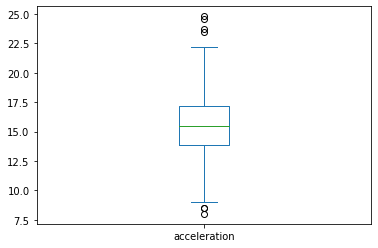

In [33]:
# A boxplot gives a good indication of distribution of data about the median. 
cars_df['acceleration'].plot(kind='box')
plt.show()

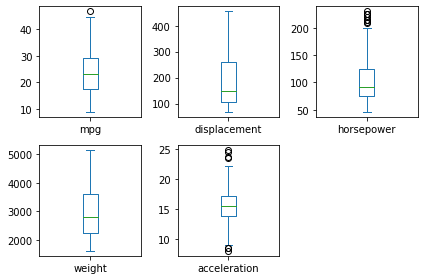

In [34]:
# box-plot for all numerical columns of the DataFrame: cars_df
# plt.subplot(norows, ncols, plot_number)
# Plotting subplots On a grid of 2 rows x 3 columns

# box plot for mpg
plt.subplot(2,3,1)
cars_df['mpg'].plot(kind='box') 

# box plot for displacement
plt.subplot(2,3,2) 
cars_df['displacement'].plot(kind='box') 

# box plot for horsepower
plt.subplot(2,3,3) 
cars_df['horsepower'].plot(kind='box') 

# box plot for weight
plt.subplot(2,3,4) 
cars_df['weight'].plot(kind='box') 

# box plot for acceleration
plt.subplot(2,3,5) 
cars_df['acceleration'].plot(kind='box') 

plt.tight_layout()
plt.show()

In [37]:
# Get summary statistics for the columns plotted above
cars_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].describe()

mpg  displacement  horsepower       weight  acceleration
count  398.000000    398.000000  398.000000   398.000000    398.000000
mean    23.514573    193.425879  104.099083  2970.424623     15.568090
std      7.815984    104.269838   38.336173   846.841774      2.757689
min      9.000000     68.000000   46.000000  1613.000000      8.000000
25%     17.500000    104.250000   75.000000  2223.750000     13.825000
50%     23.000000    148.500000   92.000000  2803.500000     15.500000
75%     29.000000    262.000000  125.000000  3608.000000     17.175000
max     46.600000    455.000000  230.000000  5140.000000     24.800000

In [40]:
# finding the upper and lower limit

def find_outlier_limits(col_name):
    Q1,Q3=cars_df[col_name].quantile([.25,.75])
    IQR=Q3-Q1
    low=Q1-(1.5* IQR)
    high=Q3+(1.5* IQR)
    return (high,low)

high_hp,low_hp=find_outlier_limits('horsepower')
print('Horsepower: ','upper limit: ',high_hp,' lower limit: ',low_hp)
high_acc,low_acc=find_outlier_limits('acceleration')
print('Acceleration: ','upper limit: ',high_acc,' lower limit:',low_acc)

Horsepower:  upper limit:  200.0  lower limit:  0.0
Acceleration:  upper limit:  22.2  lower limit: 8.8


In [42]:
# Replacing outlier values with respective upper and lower limits

cars_df.loc[cars_df['horsepower']>high_hp,'horsepower']=high_hp
cars_df.loc[cars_df['acceleration']>high_acc,'acceleration']=high_acc
cars_df.loc[cars_df['acceleration']<low_acc,'acceleration']=low_acc

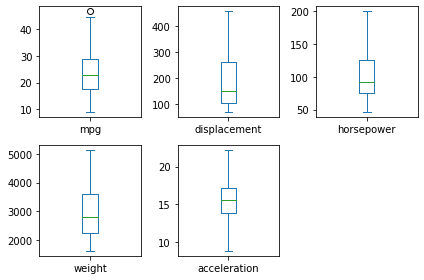

In [43]:
# box-plot for all numerical columns of the DataFrame: cars_df
# plt.subplot(norows, ncols, plot_number)
# Plotting subplots On a grid of 2 rows x 3 columns

# box plot for mpg
plt.subplot(2,3,1)
cars_df['mpg'].plot(kind='box') 

# box plot for displacement
plt.subplot(2,3,2) 
cars_df['displacement'].plot(kind='box') 

# box plot for horsepower
plt.subplot(2,3,3) 
cars_df['horsepower'].plot(kind='box') 

# box plot for weight
plt.subplot(2,3,4) 
cars_df['weight'].plot(kind='box') 

# box plot for acceleration
plt.subplot(2,3,5) 
cars_df['acceleration'].plot(kind='box') 

plt.tight_layout()
plt.show()

<hr style="border:2px solid gray">

#**STEP: 4/4** - Encode categorical columns and build a Random Forest Model


In [44]:
# Split the data into Feature Matrix and Target Vector

target = 'mpg'
y = cars_df[target]
X = cars_df.drop(columns=[target])

In [45]:
# Split data into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
#Determine the baseline MAE

y_pred_baseline = [y_train.mean()] * len(y_train)
print('BASELINE MAE', mean_absolute_error(y_train,y_pred_baseline))

BASELINE MAE 6.684739527708555


In [47]:
# Random Forest Regressor

model = make_pipeline(
    OrdinalEncoder(),
    #Simple Imputer(),
    RandomForestRegressor(random_state=42, n_jobs=-1)
);

model.fit(X_train, y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['origin'],
                                mapping=[{'col': 'origin',
                                          'data_type': CategoricalDtype(categories=['europe', 'japan', 'usa'], ordered=False),
                                          'mapping': usa       1
japan     2
europe    3
NaN      -2
dtype: int64}])),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [48]:
# Mapping of class to label used for encoding

model.named_steps['ordinalencoder'].category_mapping

[{'col': 'origin', 'mapping': usa       1
  japan     2
  europe    3
  NaN      -2
  dtype: int64, 'data_type': CategoricalDtype(categories=['europe', 'japan', 'usa'], ordered=False)}]

In [49]:
# check your metrics
print('Test MAE:', mean_absolute_error(y_test, model.predict(X_test)))

Test MAE: 1.6458249999999992


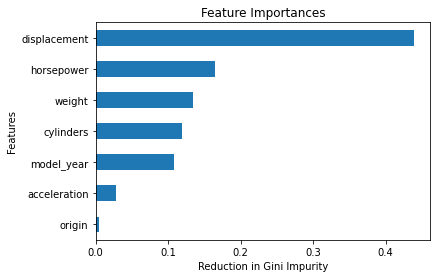

In [51]:
# Plot the top ten feature importances

importances = model.named_steps['randomforestregressor'].feature_importances_
features = model.named_steps['ordinalencoder'].get_feature_names()
feat_imp = pd.Series(importances, index=features).sort_values(key=abs)
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Reduction in Gini Impurity')
plt.ylabel('Features')
plt.title('Feature Importances');